In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np
import matplotlib.dates as mdates

In [16]:
cab_data = pd.read_csv("Cab_Data.csv")
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [11]:
city = pd.read_csv("city.csv")
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [12]:
customer_id = pd.read_csv("Customer_Id.csv")
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [13]:
transaction_id = pd.read_csv("Transaction_Id.csv")
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [14]:
master = pd.DataFrame(cab_data)
master = pd.merge(master, transaction_id, on=['Transaction ID'])
master = pd.merge(master, city, on=['City'])
master = pd.merge(master, customer_id, on=['Customer ID'])

In [15]:
master.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,"814,885","24,701",Male,28,10813
1,10351127,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,"814,885","24,701",Male,28,10813
2,10412921,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,"814,885","24,701",Male,28,10813
3,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,"814,885","24,701",Male,27,9237
4,10320494,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,"814,885","24,701",Male,27,9237


In [16]:
master.to_csv('master.csv')

# City Analysis

In [46]:
city = pd.read_csv("city.csv")
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [90]:
city.shape

(20, 4)

In [91]:
city.describe

<bound method NDFrame.describe of                 City  Population   Users  Non_Users
0        NEW YORK NY     8405837  302149    8103688
1         CHICAGO IL     1955130  164468    1790662
2     LOS ANGELES CA     1595037  144132    1450905
3           MIAMI FL     1339155   17675    1321480
4     SILICON VALLEY     1177609   27247    1150362
5      ORANGE COUNTY     1030185   12994    1017191
6       SAN DIEGO CA      959307   69995     889312
7         PHOENIX AZ      943999    6133     937866
8          DALLAS TX      942908   22157     920751
9         ATLANTA GA      814885   24701     790184
10         DENVER CO      754233   12421     741812
11         AUSTIN TX      698371   14978     683393
12        SEATTLE WA      671238   25063     646175
13         TUCSON AZ      631442    5712     625730
14  SAN FRANCISCO CA      629591  213609     415982
15     SACRAMENTO CA      545776    7044     538732
16     PITTSBURGH PA      542085    3643     538442
17     WASHINGTON DC      4188

In [50]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8')

population = []
for p in city['Population']:
    population.append(locale.atoi(p))
    
users = []
for u in city['Users']:
    users.append(locale.atoi(u))

non_users = np.subtract(population,users)

In [51]:
city_users = pd.DataFrame(city)
city_users['Population'] = population
city_users['Users'] = users
city_users['Non_Users'] = non_users
city_users

,City,Population,Users,Non_Users
0,NEW YORK NY,8405837,302149,8103688
1,CHICAGO IL,1955130,164468,1790662
2,LOS ANGELES CA,1595037,144132,1450905
3,MIAMI FL,1339155,17675,1321480
4,SILICON VALLEY,1177609,27247,1150362
5,ORANGE COUNTY,1030185,12994,1017191
6,SAN DIEGO CA,959307,69995,889312
7,PHOENIX AZ,943999,6133,937866
8,DALLAS TX,942908,22157,920751
9,ATLANTA GA,814885,24701,790184


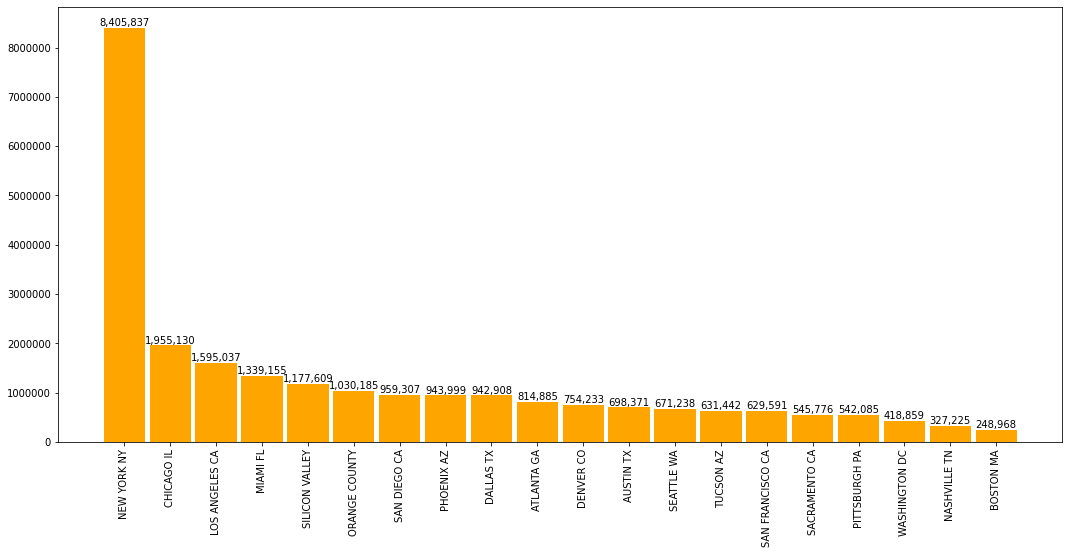

In [84]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.ticklabel_format(style='plain') 
plt.bar(city_users['City'], city_users['Population'], .9, color="orange")

container = ax.containers[0]
ax.bar_label(container, labels=[f'{x:,.0f}' for x in container.datavalues])
plt.xticks(rotation = 90)
plt.show()

In [89]:
city_perc = pd.DataFrame(city_users)
city_perc.drop(['Population'], axis=1, inplace=True)
list(city_perc.columns)

['City', 'Users', 'Non_Users']

# Company Comparisons

<AxesSubplot:xlabel='Price Charged', ylabel='Company'>

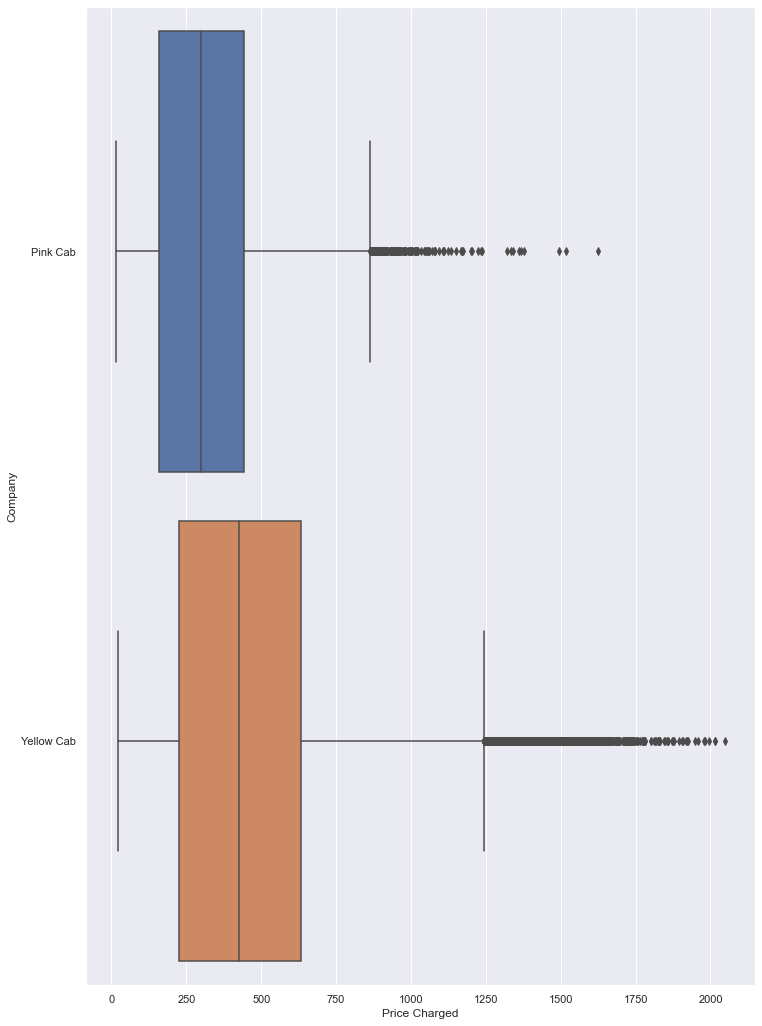

In [17]:
sns.set(rc={'figure.figsize':(12,18)})
sns.boxplot( y=cab_data["Company"], x=cab_data["Price Charged"], orient = 'h', width=.9)

<AxesSubplot:xlabel='Cost of Trip', ylabel='Company'>

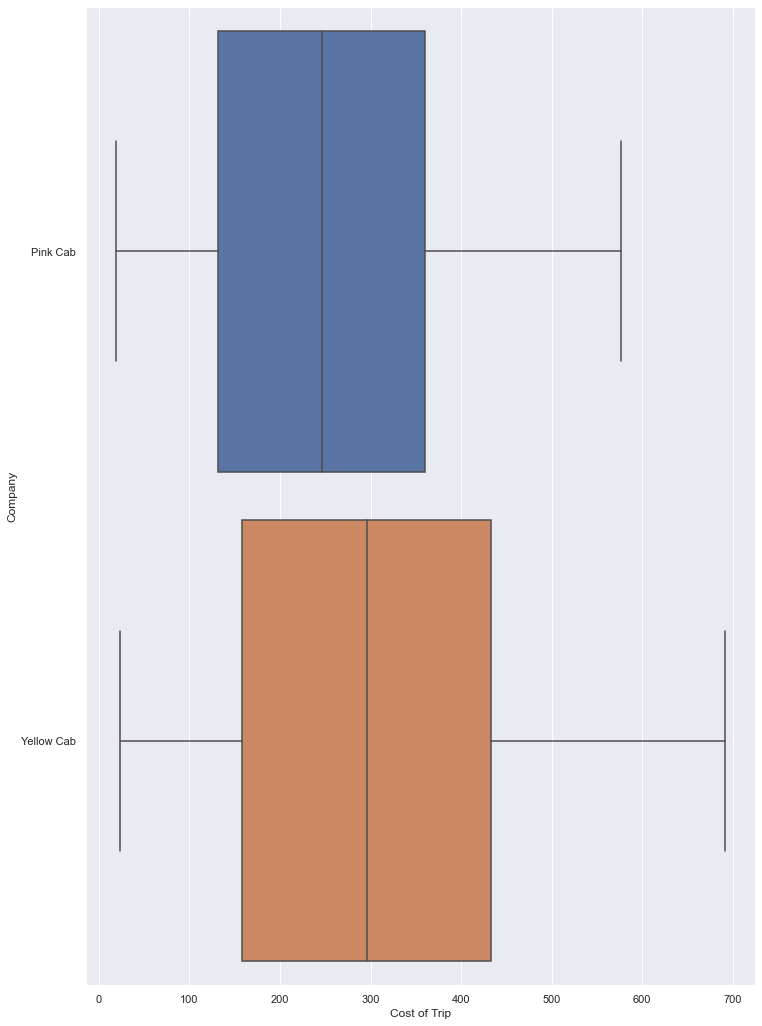

In [18]:
sns.set(rc={'figure.figsize':(12,18)})
sns.boxplot( y=cab_data["Company"], x=cab_data["Cost of Trip"], orient = 'h', width=.9)

In [17]:
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


<AxesSubplot:xlabel='Profit', ylabel='Company'>

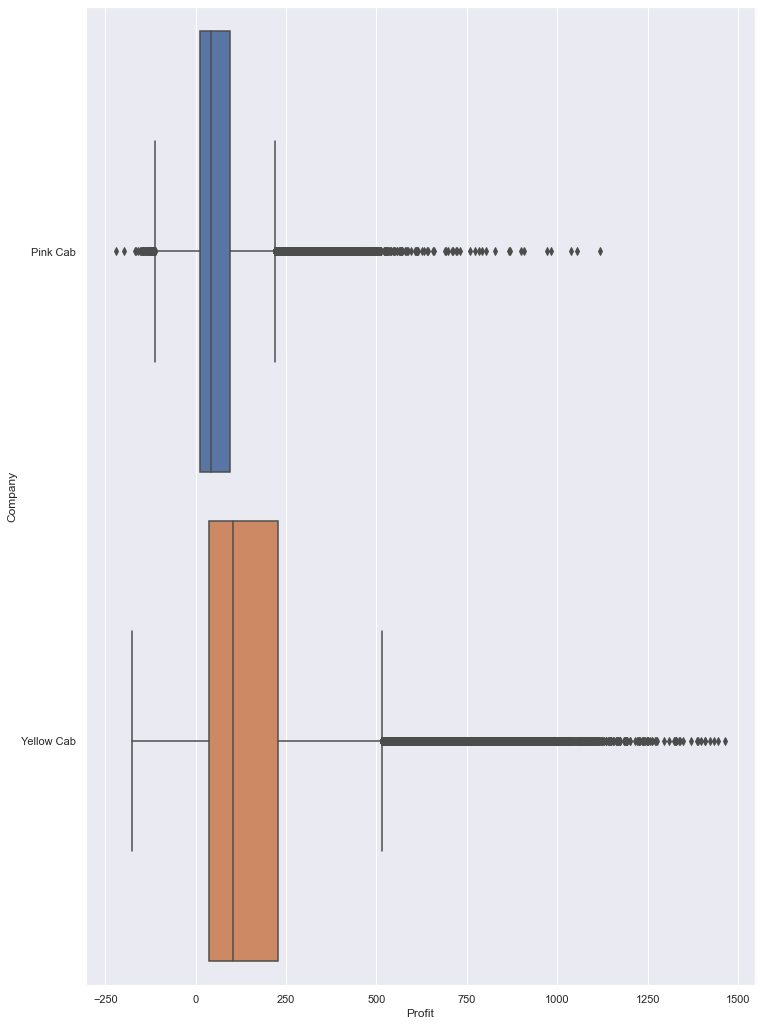

In [18]:
sns.set(rc={'figure.figsize':(12,18)})
sns.boxplot( y=cab_data["Company"], x=cab_data["Profit"], orient = 'h', width=.9)

In [266]:
yellow_cab = pd.DataFrame(cab_data[cab_data['Company'] == "Yellow Cab"])
yellow_cab['Date of Travel'] = pd.to_datetime(yellow_cab['Date of Travel'])
pink_cab = pd.DataFrame(cab_data[cab_data['Company'] == "Pink Cab"])
pink_cab['Date of Travel'] = pd.to_datetime(pink_cab['Date of Travel'])

c:\users\jefferson pelera\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\jefferson pelera\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\jefferson pelera\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\users\jefferson pelera\appdata\local\

In [267]:
yellow_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
233,10000384,2016-02-01,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,877.0076
234,10000385,2016-09-01,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,895.7768
235,10000386,2016-03-01,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,232.3320
236,10000387,2016-06-01,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,504.1600
237,10000388,2016-07-01,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,944.1908


In [268]:
pink_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


## Monthly Profits

In [273]:
yellow_pm = yellow_cab.filter(['Date of Travel','Profit'], axis=1)
yellow_pm.set_index('Date of Travel', inplace=True)
yellow_pm = yellow_pm.resample('M').sum()
yellow_pm.head()

,Profit
Date of Travel,
2016-01-31,9.168835e+05
2016-02-29,1.080657e+06
2016-03-31,1.035763e+06
2016-04-30,1.001680e+06
2016-05-31,1.244087e+06


In [275]:
pink_pm = pink_cab.filter(['Date of Travel','Profit'], axis=1)
pink_pm.set_index('Date of Travel', inplace=True)
pink_pm = pink_pm.resample('m').sum()
pink_pm.head()

,Profit
Date of Travel,
2016-01-31,82801.429
2016-02-29,114194.591
2016-03-31,137391.681
2016-04-30,100036.797
2016-05-31,91607.288


<function matplotlib.pyplot.show(close=None, block=None)>

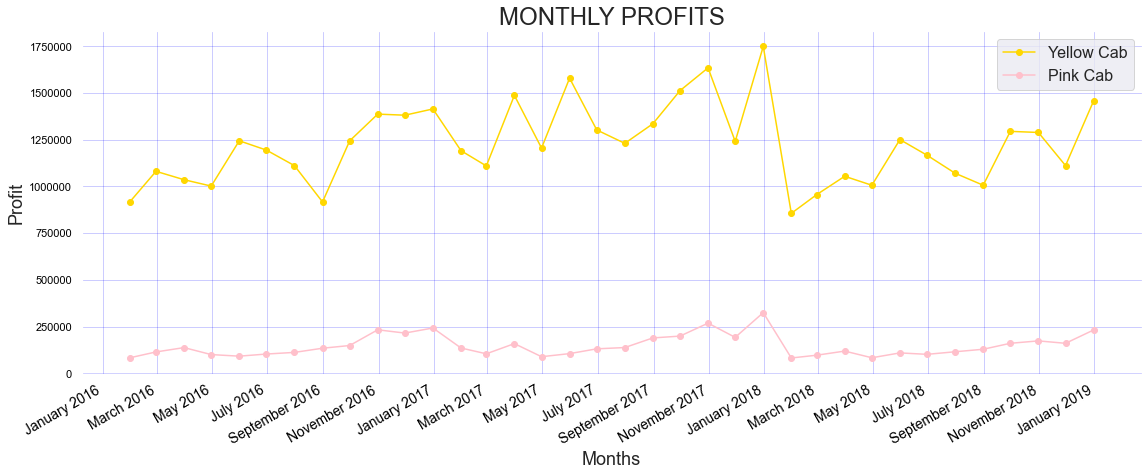

In [247]:
fig, ax = plt.subplots(figsize=(19, 7))
ax.set_facecolor("white")
ax.tick_params(width=1, colors='black', grid_color='blue', grid_alpha=0.2)
ax.ticklabel_format(style='plain')

plt.plot(yellow_pm, label = "Yellow Cab", linestyle="-", color ="Gold", marker = 'o')
plt.plot(pink_pm, label = "Pink Cab", linestyle="-", color ="Pink", marker = 'o')

time_interval = mdates.MonthLocator(interval=2)
date_format = mdates.DateFormatter("%B %Y")
ax.xaxis.set_major_locator(time_interval)
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

plt.xticks(fontsize=14)
plt.title('MONTHLY PROFITS',  fontsize = 24)
plt.xlabel('Months', fontsize = 18)
plt.ylabel('Profit', fontsize = 18)
plt.legend(fontsize = 16)
plt.show

## Average monthly profits

Analysis below was a trial to try and find averages for each month

In [90]:
pink_cab_mprofits = pd.DataFrame(pink_cab)
pink_cab_mprofits['month'] = pd.DatetimeIndex(pink_cab_mprofits['Date of Travel']).month
pink_cab_mprofits['month'] = pd.to_datetime(pink_cab_mprofits['month'],format='%m').dt.month_name()

In [91]:
yellow_cab_mprofits = pd.DataFrame(yellow_cab)
yellow_cab_mprofits['month'] = pd.DatetimeIndex(yellow_cab_mprofits['Date of Travel']).month
yellow_cab_mprofits['month'] = pd.to_datetime(yellow_cab_mprofits['month'],format='%m').dt.month_name()

In [92]:
from datetime import datetime

pink_cab_mprofits.set_index('Date of Travel',inplace=True)

In [93]:
pink_cab_mprofits.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,month
Date of Travel,,,,,,,,
2016-08-01,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,August
2016-06-01,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,June
2016-02-01,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,February
2016-07-01,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,July
2016-03-01,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,March


In [94]:
months = pink_cab_mprofits.month

In [95]:
pink_monthly_avg = pink_cab_mprofits.groupby(months).Profit.mean()

In [96]:
yellow_cab_mprofits.set_index('Date of Travel',inplace=True)
months = yellow_cab_mprofits.month
yellow_monthly_avg = yellow_cab_mprofits.groupby(months).Profit.mean()

In [120]:
pink_monthly_avg

month
April        53.108778
August       56.398318
December     82.077864
February     67.138203
January      63.369105
July         51.728097
June         52.603452
March        72.477090
May          49.718518
November     65.410172
October      67.850904
September    59.626765
Name: Profit, dtype: float64

In [98]:
yellow_monthly_avg

month
April        168.415504
August       135.599042
December     153.334368
February     181.452533
January      173.241186
July         147.204087
June         178.097050
March        172.350127
May          191.177561
November     140.667107
October      147.226827
September    159.613271
Name: Profit, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

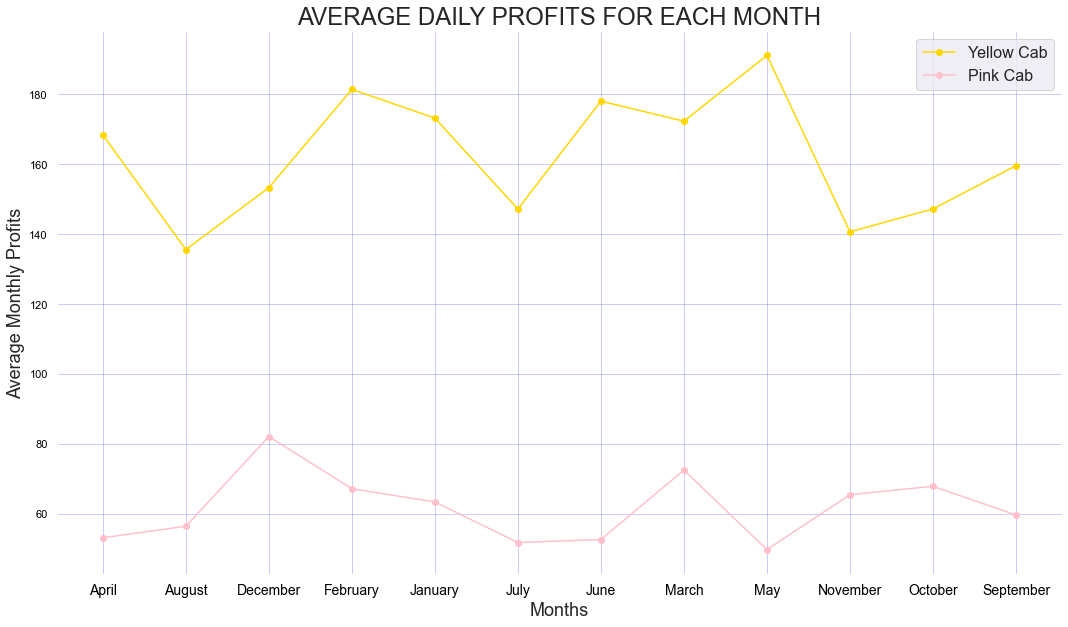

In [236]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_facecolor("white")
ax.tick_params(width=1, colors='black', grid_color='blue', grid_alpha=0.2)

plt.plot(yellow_monthly_avg, label = "Yellow Cab", linestyle="-", color ="Gold", marker = 'o')
plt.plot(pink_monthly_avg, label = "Pink Cab", linestyle="-", color ="Pink", marker = 'o')

plt.xticks(fontsize=14)

plt.title('AVERAGE DAILY PROFITS FOR EACH MONTH',  fontsize = 24)
plt.xlabel('Months', fontsize = 18)
plt.ylabel('Average Monthly Profits', fontsize = 18)
plt.legend(fontsize = 16)
plt.show